In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import copy

In [2]:
#question1
#remove rows with 'NA'
data = pd.read_csv('real_estate.csv')
raw_data = data.copy()
lenth = data.shape[0]
index_in_file = []
index_in_code = []
for i in range(lenth):
    if data.iloc[i].isnull().any():
        index_in_file.append(i + 2)
        index_in_code.append(i)
print('The index of removed rows in the file are ',index_in_file)
data = data.drop(index = data.index[index_in_code])
data = data.reset_index(drop = False)
data = data.drop(['transactiondate', 'latitude', 'longitude', 'price'], axis = 1)

The index of removed rows in the file are  [21, 43, 111, 146, 232, 303]


In [3]:
features = ['age', 'nearestMRT', 'nConvenience']
for feature in features:
    minx = min(data[feature])
    maxx = max(data[feature])
    for i in data.index:
        data.loc[i, feature] = (data.loc[i,feature] - minx) / (maxx - minx)
mean_feature = {}
for feature in features:
    mean_feature[feature] = np.mean(data[feature])
    print('The mean value of feature \'', feature, '\' = ', mean_feature[feature])

The mean value of feature ' age ' =  0.40607932670785213
The mean value of feature ' nearestMRT ' =  0.16264267697310722
The mean value of feature ' nConvenience ' =  0.4120098039215686


In [4]:
lenth = data.shape[0]
cut = lenth // 2


print('The first row of the training set is \n', data.loc[0][1:],
      '\nThe last row of the training set is \n', data.loc[cut - 1][1:],
      '\nThe first row of the testing set is \n', data.loc[cut][1:],
      '\nThe last row of the tesing set is \n', data.loc[cut+cut-1][1:])

X = np.zeros((lenth,1,4))

for i in data.index:
    X[i] = [1,data.loc[i, 'age'], data.loc[i,'nearestMRT'], data.loc[i, 'nConvenience']]

y = np.zeros((lenth,1))
for i in range(len(X)):
    raw_index = data.loc[i, 'index']  #the index in raw_data
    y[i] = raw_data.loc[raw_index, 'price']

X_train = X[0 : cut]
X_test = X[cut : cut + cut]
y_train = y[0 : cut]
y_test = y[cut : cut + cut]

The first row of the training set is 
 age             0.730594
nearestMRT      0.009513
nConvenience    1.000000
Name: 0, dtype: float64 
The last row of the training set is 
 age             0.878995
nearestMRT      0.099260
nConvenience    0.300000
Name: 203, dtype: float64 
The first row of the testing set is 
 age             0.262557
nearestMRT      0.206780
nConvenience    0.100000
Name: 204, dtype: float64 
The last row of the tesing set is 
 age             0.148402
nearestMRT      0.010375
nConvenience    0.900000
Name: 407, dtype: float64


In [5]:
#question 5

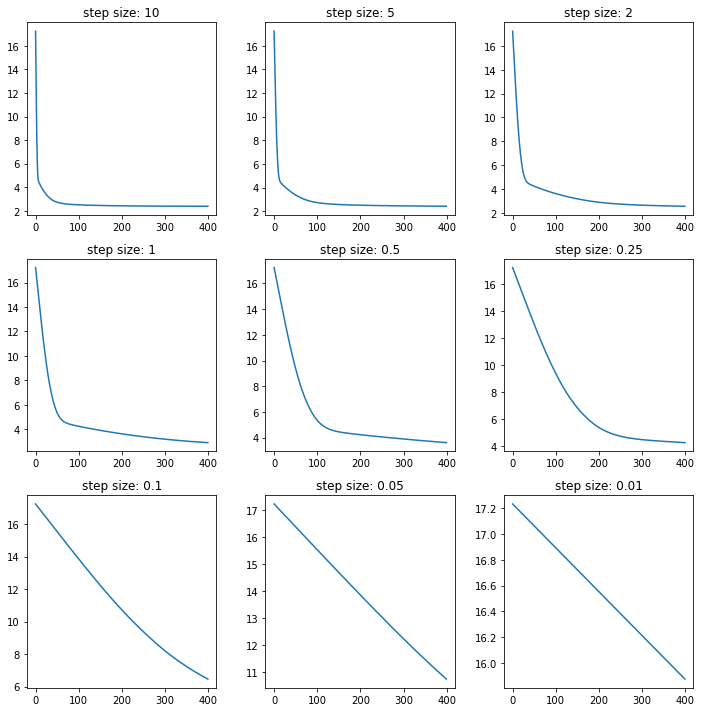

In [6]:

losses = []

fig, ax = plt.subplots(3,3, figsize=(10,10))
nIter = 400
alphas = [10,5,2, 1,0.5, 0.25,0.1, 0.05, 0.01]

#losses.shape: 9 * lenth
for eta in alphas:
    w0 = np.ones((4,1))
    loss_per_iter = []
    for iteration in range(nIter):
        loss_all_row = 0
        partial_matrix = np.zeros((4,1))
        for i in range(len(X_train)):
            dot_item = float(np.dot(X_train[i], w0))
            loss_all_row += (1/4 * (float(y[i]) - dot_item)**2 + 1)**0.5 - 1
            #update w0
            for j in range(len(partial_matrix)):   #for each w in w0
                partial_matrix[j] += X_train[i][0][j]*(dot_item - float(y[i])) / (2*(((dot_item - float(y[i]))**2 + 4))**0.5)
        loss_per_iter.append(loss_all_row / len(X_train))
        w0 = w0 - eta * (1/len(X_train)) * partial_matrix
    losses.append(loss_per_iter)



for i, ax in enumerate(ax.flat):
    # losses is a list of 9 elements. Each element is an array of length nIter
    #storing the loss at each iteration for
            # that particular step size
    ax.plot(losses[i])
    ax.set_title(f"step size: {alphas[i]}") # plot titles
plt.tight_layout() # plot formatting 
plt.show()

In [7]:
for i in range(len(losses)):
    print('step size = ', alphas[i])
    print(losses[i][-5:])

step size =  10
[2.3927018418258172, 2.3926608150333175, 2.392620304610336, 2.3925803040813585, 2.3925408070502443]
step size =  5
[2.4277503662285844, 2.4275214736661677, 2.4272938741798584, 2.427067561002048, 2.4268425274036134]
step size =  2
[2.5593420321587272, 2.558745222802191, 2.5581526861404136, 2.5575643684588902, 2.556980216854798]
step size =  1
[2.9015885745622314, 2.899413285131944, 2.8972514665596516, 2.8951030543998875, 2.892967983619279]
step size =  0.5
[3.62493851175182, 3.6223039821454837, 3.6196742150619516, 3.6170492074728555, 3.6144289561274814]
step size =  0.25
[4.238886433565084, 4.237039240386922, 4.235195268508821, 4.233354456441879, 4.231516744594863]
step size =  0.1
[6.522263690510315, 6.508037441211672, 6.493875749943878, 6.479778369830194, 6.465745048736023]
step size =  0.05
[10.787560137156808, 10.773213188262783, 10.758882181452568, 10.744567112497277, 10.730267978499299]
step size =  0.01
[15.888484301740444, 15.885082909455905, 15.881681563192704, 

In [8]:
#question 5 c
eta = 0.3
w0 = np.ones((4,1))
w_list = []
w_list.append(w0)
for iteration in range(nIter):
    loss_all_row = 0
    partial_matrix = np.zeros((4,1))
    for i in range(len(X_train)):
        dot_item = float(np.dot(X_train[i], w0))
        loss_all_row += (1/4 * (float(y_train[i]) - dot_item)**2 + 1)**0.5 - 1
        #update w0
        for j in range(len(partial_matrix)):   #for each w in w0
            partial_matrix[j] += X_train[i][0][j]*(dot_item - float(y_train[i])) / (2*(((dot_item - float(y_train[i]))**2 + 4))**0.5)
    w0 = w0 - eta * (1/len(X_train)) * partial_matrix
    w_list.append(w0)

[[26.11838076]
 [ 7.55495429]
 [ 0.22091267]
 [15.88216107]]


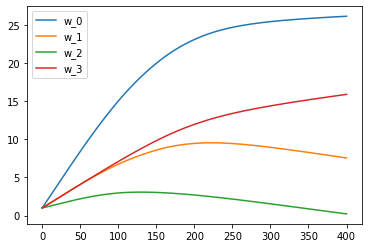

In [9]:
print(w_list[-1])
w_list = np.array(w_list)
w_t = w_list.T[0]
for i in range(len(w_t)):
    plt.plot(w_t[i], label = ['w_0', 'w_1', 'w_2', 'w_3'][i])
    plt.legend()
plt.show()

In [10]:
train_loss = 0
w0 = w_list[-1]
for i in range(len(X_train)):
    dot_item = float(np.dot(X_train[i], w0))
    train_loss += (1/4 * (float(y_train[i]) - dot_item)**2 + 1)**0.5 - 1
print(train_loss / len(X_train))

#calculate loss in test data
test_loss = 0
for i in range(len(X_test)):
    dot_item = float(np.dot(X_test[i], w0))
    test_loss += (1/4 * (float(y_test[i]) - dot_item)**2 + 1)**0.5 - 1
print(test_loss/len(X_test))

4.089850739201337
3.827500929218835


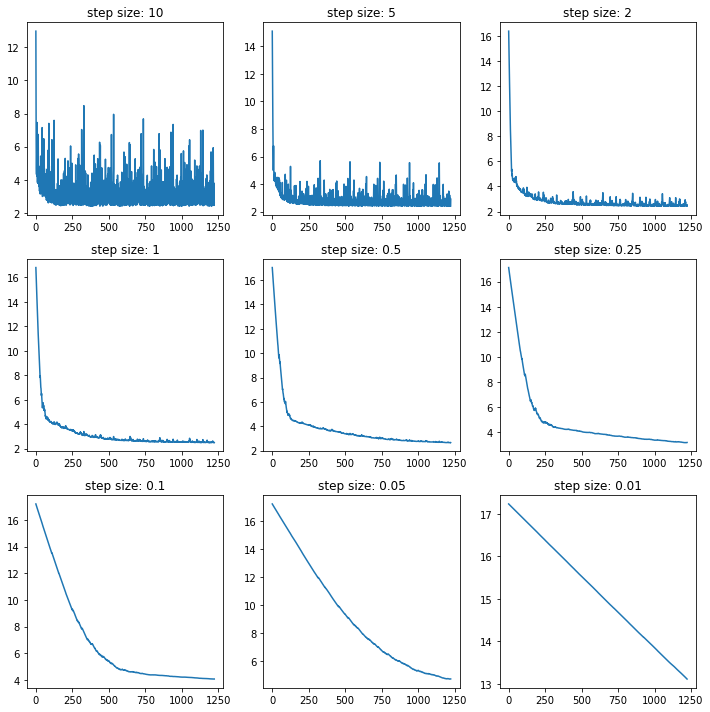

In [11]:
#question6.a
epoch = 6
losses = []

fig, ax = plt.subplots(3,3, figsize=(10,10))
nIter = 400
alphas = [10,5,2, 1,0.5, 0.25,0.1, 0.05, 0.01]


for eta in alphas:
    w0 = np.ones((4,1))
    loss_per_eta = []
    partial_matrix = np.zeros((4,1))
    for iteration in range(epoch):
        for i in range(len(X_train)):
            dot_item = float(np.dot(X_train[i], w0))
            #update w0
            for j in range(len(partial_matrix)):   #for each w in w0
                partial_matrix[j] = X_train[i][0][j]*(dot_item - float(y_train[i])) / (2*(((dot_item - float(y_train[i]))**2 + 4))**0.5)
            w0 = w0 - eta * partial_matrix
            
            loss_all_row = 0
            for k in range(len(X_train)):
                dot_item = float(np.dot(X_train[k], w0))
                loss_all_row += (1/4 * (float(y_train[k]) - dot_item)**2 + 1)**0.5 - 1
            loss_per_eta.append(loss_all_row/len(X_train))
    losses.append(loss_per_eta)



for i, ax in enumerate(ax.flat):
    ax.plot(losses[i])
    ax.set_title(f"step size: {alphas[i]}") # plot titles
plt.tight_layout() # plot formatting 
plt.show()


In [12]:
for i in range(9):
    print('step size = ', alphas[i])
    print(losses[i][-10:])

step size =  10
[2.6272698430458035, 4.986623770856904, 5.9343890709185905, 3.3580952382304954, 2.4773334842545576, 3.130671122095789, 2.4477424405488493, 3.7938564298954547, 2.471701524088955, 2.596738520994503]
step size =  5
[2.419564897945045, 2.607807802760025, 3.198011342890384, 2.5339591989239083, 2.4084244379539617, 2.5896911835714733, 2.3938252475897595, 2.6835114219439298, 2.9573071088328478, 2.4122552203915952]
step size =  2
[2.5450588858216325, 2.4344450861695064, 2.425864825139093, 2.436295460584729, 2.4355306446139724, 2.4931963208295067, 2.4302450358046865, 2.4361534484486875, 2.5555522726443116, 2.437132220456736]
step size =  1
[2.5521992608589965, 2.508980865703362, 2.4960674148746773, 2.511824415257782, 2.515168546081596, 2.546428675786477, 2.5150260281611905, 2.496418356202346, 2.5005447244861934, 2.494297787694]
step size =  0.5
[2.657429491912484, 2.662918943546366, 2.665855531236705, 2.6585000017977802, 2.658137716771898, 2.6568585624095227, 2.656472000938984, 2

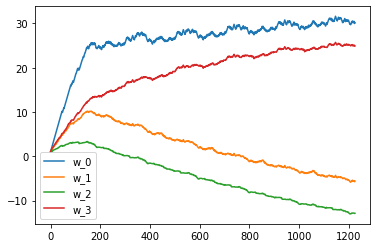

In [13]:
w0 = np.ones((4,1))
eta = 0.4
w_list = []
w_list.append(w0)
loss_per_eta = []
partial_matrix = np.zeros((4,1))
for iteration in range(epoch):
    for i in range(len(X_train)):
        dot_item = float(np.dot(X_train[i], w0))
        #update w0
        for j in range(len(partial_matrix)):   #for each w in w0
            partial_matrix[j] = X_train[i][0][j]*(dot_item - float(y_train[i])) / (2*(((dot_item - float(y_train[i]))**2 + 4))**0.5)
        w0 = w0 - eta * partial_matrix
        w_list.append(w0)
w_list = np.array(w_list)
w_t = w_list.T[0]
for i in range(len(w_t)):
    plt.plot(w_t[i], label = ['w_0', 'w_1', 'w_2', 'w_3'][i])
    plt.legend()
plt.show()

In [14]:
train_loss = 0
w0 = w_list[-1]
print(w0)
for i in range(len(X_train)):
    dot_item = float(np.dot(X_train[i], w0))
    train_loss += (1/4 * (float(y_train[i]) - dot_item)**2 + 1)**0.5 - 1
print(train_loss / len(X_train))

#calculate loss in test data
test_loss = 0
for i in range(len(X_test)):
    dot_item = float(np.dot(X_test[i], w0))
    test_loss += (1/4 * (float(y_test[i]) - dot_item)**2 + 1)**0.5 - 1
print(test_loss/len(X_test))

[[ 30.13206316]
 [ -5.58368145]
 [-12.85975331]
 [ 24.87535719]]
2.780238696600798
2.8448220512160347
